<a href="https://colab.research.google.com/github/leekj3133/dss_JU/blob/main/Dacon/Lv3.%20%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%EA%B3%BC%20LGBM%20%EB%AA%A8%EB%8D%B8%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EC%99%80%EC%9D%B8%20%ED%92%88%EC%A7%88%20%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0/Lv3_EDA_7_7_%EB%B3%80%EC%88%98%EB%B6%84%ED%8F%AC_%EC%8B%9C%EA%B0%81%ED%99%94%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 한글 글꼴 다운로드
---
해당 셀을 실행하고 [런타임] - [런타임 다시 시작] 후 아래 셀들을 수행하세요.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,053 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [2]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
  
    existing_zip.extractall('data')

--2021-09-13 06:23:18--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2021-09-13 06:23:18--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 64.233.191.139, 64.233.191.102, 64.233.191.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.191.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6s7te2ckhqo6u44o12gcpukg5gee9970/1631514150000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2021-09-13 06:23:19--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/

## 라이브러리 불러오기
---

In [3]:
import pandas as pd

# 시각화에 필요한 라이브러리를 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 쥬피터노트에서 결과를 출력하도록 설정
%matplotlib inline

# 글꼴 설정
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기
---

In [4]:
train = pd.read_csv('data/train.csv')

## 👋 실습
---

시각화를 진행할 때는 보통 copy() 매서드로 복사본을 생성한 후 진행합니다.

In [7]:
# copy() 매서드로 학습 데이터의 복사본을 생성하세요.
df = train.copy()
df.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


seaborn 의 distplot() 매서드를 이용합니다.

-------------------------------------------------------------------------------

sns.distplot(df['피쳐명'], kde=True, bins=None)

df['피쳐명']: 출력하고자 하는 컬럼

kde: '그래프에 선을 출력할지 여부'

bins: '출력할 막대그래프 갯수'

-------------------------------------------------------------------------------



	matplotlib 의 axis() 매서드로 그래프 축의 최솟값, 최댓값을 지정할 수 있습니다.

-------------------------------------------------------------------------------

plt.axis(['x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값'])

-------------------------------------------------------------------------------



	matplotlib 의 title() 매서드로 그래프의 제목을 지정할 수 있습니다.

-------------------------------------------------------------------------------

plt.title('제목')

-------------------------------------------------------------------------------



	matplotlib 의 show() 매서드로 그래프를 출력할 수 있습니다.

-------------------------------------------------------------------------------

plt.show()

-------------------------------------------------------------------------------


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


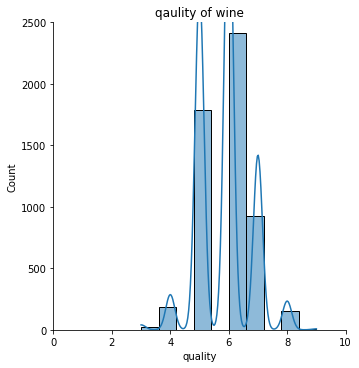

In [14]:
# 타깃 변수(와인품질)의 분포를 시각화합니다.

#1 seaborn 의 displot() 으로 어느 변수를 시각화할지 옵션에 지정해주세요.
sns.displot(df["quality"],kde=True, bins=10)
#2 matplot 의 axis() 로 각 축의 최소, 최대 값을 지정해주세요.
plt.axis([0,10,0,2500])
#3 matplot 의 title() 로 그래프의 제목을 지정해주세요.
plt.title("qaulity of wine")
#4 matplot 의 show() 로 그래프를 출력해주세요.
plt.show();

## 정답
---

In [ ]:
# copy() 매서드로 학습 데이터의 복사본을 생성하세요.
traindata = train.copy()

In [ ]:
# 타깃 변수(와인 품질) 분포 시각화
sns.distplot(traindata['quality'], kde=False, bins=10)
plt.axis([0, 10, 0, 2500]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("와인 품질") # 그래프 제목 지정
plt.show() # 그래프 그리기

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)